In [2]:
#1 import needed modules
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
#2 load data
data = pd.read_csv('psyc.csv')

#3 set the features, target, and values of k
features = ['gender','age','openness','neuroticism','conscientiousness','agreeableness','extraversion']
target = "Personality"
knn = 5

#4 clean up dataset and replace all strings under features with int value
data = data.dropna()
data["gender"] = data["gender"].map({"Male":1,"Female":2})

In [6]:
#5 divide dataset to training and test set with test set having 30% of dataset size
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

print(train)
print(test)

     gender  age  openness  neuroticism  conscientiousness  agreeableness  \
256       2   22         5            3                  4              5   
66        1   19         1            4                  6              7   
126       1   20         6            1                  3              7   
18        1   23         4            2                  1              5   
179       1   21         4            4                  1              6   
..      ...  ...       ...          ...                ...            ...   
188       2   23         6            6                  6              3   
71        2   24         6            4                  4              1   
106       2   22         6            2                  1              6   
270       2   18         5            8                  5              5   
102       2   23         6            6                  1              2   

     extraversion  Personality  
256             2  responsible  
66       

In [7]:
def get_arr_distances(test_predict):
    #ready value before getting distances
    train_data = train[features].to_numpy()
    test_data = np.array([test_predict[feature] for feature in features])

    #get distance
    euc_distances = np.sqrt(np.sum((train_data - test_data)**2, axis=1))      #arr of euclidean distance result
    mnhtn_distances = np.sum(np.abs(train_data - test_data),axis=1)           #arr of manhattan distance result
    mnsk_distances = np.sum(np.abs(train_data - test_data)**1, axis=1)**(1/1) #arr of minkowski distance result w/ p=1

    return pd.DataFrame({target: train[target], 
                         "euc_distance": euc_distances,
                         "mnhtn_distance": mnhtn_distances,
                         "mnsk_distance": mnsk_distances})

In [16]:
def classify(test_predict):
    #will sort the array of distances
    rank = get_arr_distances(test_predict)
    euc_rank = rank.sort_values("euc_distance")
    mnhtn_rank = rank.sort_values("mnhtn_distance")
    mnsk_rank = rank.sort_values("mnsk_distance")

    #will get the most common among top k in the sorted rank
    euc_classify = Counter(euc_rank.iloc[0:knn][target]).most_common()[0][0]
    mnthn_classify =  Counter(mnhtn_rank.iloc[0:knn][target]).most_common()[0][0]
    mnsk_classify = Counter(mnsk_rank.iloc[0:knn][target]).most_common()[0][0]
    
    return euc_classify,mnthn_classify,mnsk_classify

In [17]:
def predictions(test):
    #save all the predictions for raw data visualization
    output = pd.DataFrame()
    output["actual"] = test[target]

    #each test instance will be use ub this function
    euc_predict, mnhtn_predict, mnsk_predict = zip(*test.apply(classify, axis=1))

    output["euc_predict"] = euc_predict
    output["mnhtn_predict"] = mnhtn_predict
    output["mnsk_predict"] = mnsk_predict

    return output

In [18]:
def accuracy(output):
    euc_accu = accuracy_score(output["actual"],output["euc_predict"])
    mnhtn_accu = accuracy_score(output["actual"],output["mnhtn_predict"])
    mnsk_accu = accuracy_score(output["actual"],output["mnsk_predict"])
    
    return euc_accu,mnhtn_accu,mnsk_accu

In [19]:
def plotting(output):
    x = list(range(len(output)))
    y1 = [1 if output.iloc[i]["actual"] == output.iloc[i]["euc_predict"] else 0 for i in range(len(output))]
    y2 = [1 if output.iloc[i]["actual"] == output.iloc[i]["mnhtn_predict"] else 0 for i in range(len(output))]
    y3 = [1 if output.iloc[i]["actual"] == output.iloc[i]["mnsk_predict"] else 0 for i in range(len(output))]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    ax1.plot(x, y1, label="Euclidean")
    ax1.set_title('Euclidean')
    ax2.plot(x, y2, label="Manhattan")
    ax2.set_title("Manhattan")
    ax3.plot(x, y3, label="Minkowski (p=1)")
    ax3.set_title("Minkowski (p=1)")

    plt.tight_layout()
    plt.show()



          actual  euc_predict mnhtn_predict mnsk_predict
206      serious      serious       serious      serious
33        lively      serious        lively       lively
163      serious      serious       serious      serious
78       serious      serious       serious      serious
93       serious      serious       serious      serious
..           ...          ...           ...          ...
253  extraverted  extraverted   extraverted  extraverted
294  extraverted  extraverted   extraverted  extraverted
144   dependable      serious    dependable   dependable
176       lively       lively        lively       lively
101  extraverted  extraverted   extraverted  extraverted

[95 rows x 4 columns]
Accuracy
Euclidean: 0.5684210526315789
Manhattan: 0.6105263157894737
Minkowski: 0.6105263157894737


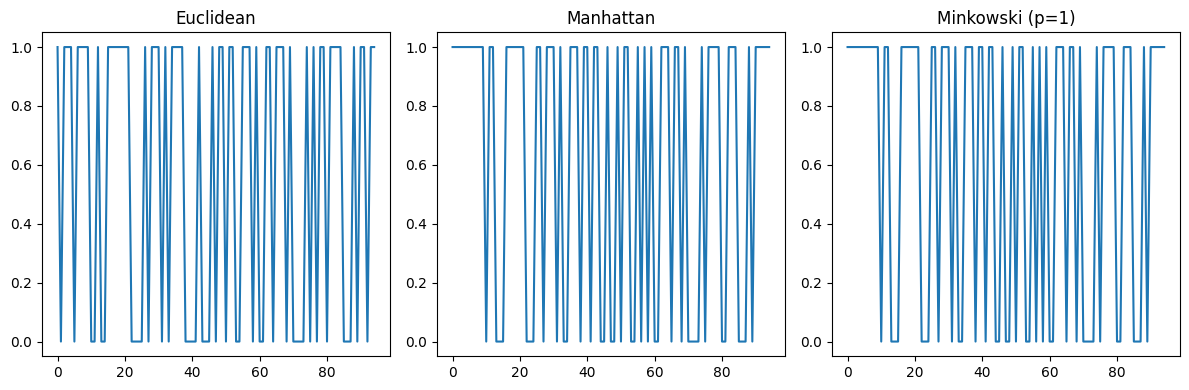

In [20]:
#this will return arrays of prediction using accuracies of euclidean, manhattan, and minkowski
predict = predictions(test)

#this will return the accuracies of euclidean, manhattan, and minkowski
accuracies = accuracy(predict)
print(predict)
print(f"Accuracy\nEuclidean: {accuracies[0]}\nManhattan: {accuracies[1]}\nMinkowski: {accuracies[2]}")
plotting(predict)